# BootCamp Data Science Aplicada - Alura

   #### Felipe Chermont Pereira

## *Módulo 02* - Visualizaão de Dados com Seaborn e Matplotlib

### *Aula 01* - Fontes externas, limpeza e manipulação de dados

Para esta aula, continuaremos a trabalhar com a fonte de dados utilizada no módulo anterior

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO
import seaborn as sns
from datetime import date

# bibliotecas utilizadas na parte de web scraping
import requests
from bs4 import BeautifulSoup

Vamos realizar a leitura dos dados, fazendo uma requisição http

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/chermont04/BootCamp-Alura/main/dados/A160324189_28_143_208.csv",
                   encoding = "ISO-8859-1",
                   skiprows = 3,
                   sep = ";",
                   skipfooter = 12,
                   thousands = ".",
                   decimal = ",",
                   engine = "python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


Para inicio deste módulo, precisamos pegar algumas análises realizadas no módulo passado, caso tenha alguma dúvida ou dificuldade para entendimento, todos os passos foram detalhados no [Modulo 1](https://github.com/chermont04/BootCamp-Alura/blob/main/modulos/Modulo_01.ipynb).

In [3]:
pd.options.display.float_format = "{:.2f}".format #Retirando a notação científica

# Pegamos apenas os anos usaveis
colunas_usaveis = dados.mean().index.tolist()

# adicionamos o indice 0 como "Unidade da Federação"
colunas_usaveis.insert(0, "Unidade da Federação")

# Setar o index como Unidade da Federação em uma nova base usaveis
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

# Vamos ordenar as clunas pelo Total
ordenado_total = usaveis.sort_values('Total', ascending=False)

# Agora podemos dropar a coluna Total
ordenado_total = ordenado_total.drop('Total', axis = 1)
# Divindo por 1 milhão para reduzir a escala gráfica
ordenado_total = ordenado_total/1000000
# Filtrar os meses
meses_filtrados = ordenado_total.columns[47:150]
# Analisra o mes mais recente
mes_mais_recente = ordenado_total.columns[-1]
gastos_do_mais_recente = ordenado_total[mes_mais_recente]
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending = False)

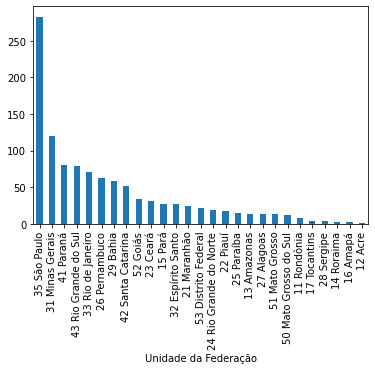

In [4]:
gastos_do_mais_recente.plot(kind='bar')

Podemos apresentar o gráfico de gastos ordenados de forma proporcional.

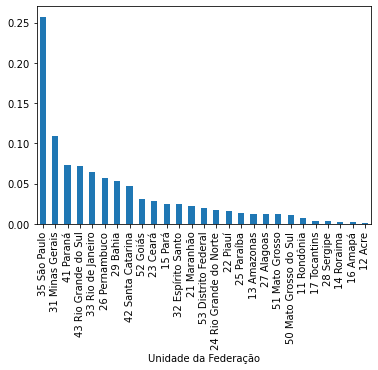

In [5]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind = 'bar')

para leitura dos dados em XLS, podemos utilizar o método read_excel() do pandas

In [6]:
ibge_estimativa = pd.read_excel("https://github.com/chermont04/BootCamp-Alura/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


Muitas vezes, estes dados podem ser buscados de outra forma. iremos buscar estes mesmos dados pela tabela fornecida no [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

In [7]:
dados_da_populacao = """

Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)

"""

#fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Utiliziremos a funçao de StringIO para transformar os dados da população em uma base de dados, para então realizarmos a leitura

In [8]:
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep = "\t")
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

Podemos utilizar o método .str para acessar strings de cada linha/coluna de nossa base de dados também

In [9]:
populacao.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Ma', ' Go', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='uf')

In [10]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [11]:
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


In [12]:
populacao.join(gastos_do_mais_recente).head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan


Como podemos perceber, não foi possível juntara tabela de 2020/Jun com a da populacao, pois os nomes das Unidades Federativas estão com o número indice nelas, podemos remover esse número para realizar a junção

In [13]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

Um segundo problema é o espaço antes de cada indice

In [14]:
populacao.index = populacao.index.str.strip()
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


In [15]:
populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia Bahia,14930634,nan
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará Pará,8690745,nan


 Podemos ver que algumas tabelas de uf, o estado ficou duplicado, isto acontece provavelmente por conta do wikipedia, onde o desenvolvedor deve ter colocado uma função para aparecer o nome do estado quando não possivel carregar a bandeira. Podemos realizar uma função para realizar a retirada deste nome, quando duplicado.

In [16]:
for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [21]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


### Desafios Aula 01

1. Entre nos dados do wikipedia e Leia a Base de dados direto do Wikipedia
2. Neste desafio temos uma série de passos:
    - Padronizar os nomes das colunas
    - Transformar os dados nos tipos corretos
    - Transformar a UF em index
3. Buscar na documentação alguns métodos envolvendo strings
4. Desenvolver uma função para limpeza e tratamento dos dados, retornando duas tabelas, "populacao" e "unida"

#### Desafio: Entre nos dados do wikipedia e Leia a base de dados direto do Wikipedia

Podemos utilizar a biblioteca que importamos, [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) para realizar a extração de arquivos HTML e o requests para a requisição da url

In [22]:
# Url da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"

# Requisicao
response = requests.get(url)

# instanciando o BeautiBeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

tabela = soup.find_all('table')[0] # acha todas as tags <table> e armazena a primeira
# Estamos armazenando a primeira, pois foi inspecionado a ordem no site.

dados = pd.read_html(str(tabela)) # Leitura dos dados da tabela novamente
pop = pd.DataFrame(dados[0]) #transforma os dados num pandas dataframe e armazena os dados na variavel pop
pop.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#### Desafio: Neste desafio temos uma série de passos:
    Padronizar os nomes das colunas
    Transformar os dados nos tipos corretos
    Transformar a UF em index

para este desafio, iremos seguir os passos realizados anteriormente, afim de deixar nossa tabela limpa

In [23]:
pop = pop.dropna()
pop["populacao"] = pop["População"].str.replace(" ", "").astype(int)
pop["uf"] = pop["Unidade federativa"]
pop = pop[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 1.7+ KB


None

#### Desafio: Buscar na documentação alguns métodos envolvendo strings

Neste desafio buscamos a documentação oficial do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html) na parte de "Series.str", contém inúmeras funções utilizando .str que temos disponível na biblioteca pandas. dentre as que achei mais interessante trazer temos:
- .extract(): Extract capture groups in the regex pat as columns in a DataFrame.
- .find(): Return lowest indexes in each strings in the Series/Index.
- .lstrip(): Remove leading characters.
- .match(): Determine if each string starts with a match of a regular expression.
- .translate(): Map all characters in the string through the given mapping table.

#### Desafio: Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida"

In [24]:
def Data_cleaning(dados, url):
    #Iremos receber uma base de dados e a url da página web que iremos limpar
    
    # Requisicao
    response = requests.get(url)
    # instanciando o BeautiBeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    tabela =  pd.read_html(str(soup.find_all('table')[0]))
    pop = pd.DataFrame(tabela[0])
    pop = pop.dropna()
    pop["populacao"] = pop["População"].str.replace(" ", "").astype(int)
    pop["uf"] = pop["Unidade federativa"]
    pop = pop[["populacao", "uf"]].set_index("uf")
    
    unida = pop.join(dados)
    
    return pop, unida

### O que aprendemos 
- Como comparar os gastos em relação a determinados estados
- Como fazer a leitura de dados no formato Excel com Pandas
- Como tornar uma string em (com formato de tabela) legível em pandas usando String.IO
- Como usar Join em Pandas

### *Aula 02* - Proporcionalidades e Seaborn

Continuando a aula passada, podemos plotar o gráfico de gastos_e_população_recente

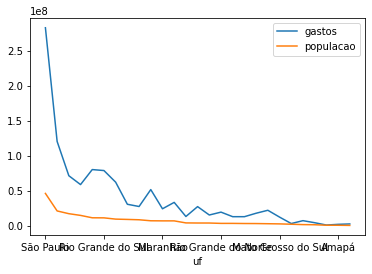

In [26]:
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 1000000
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

Este gráfico, da forma como está sendo plotado, não representa nenhuma informação realmente util para nós, pois não faz sentido coloca-los no mesmo eixo, por comparar, no mesmo eixo, valor em reais (R$) com número de pessoas (populacao).

Este tipo de gráfico, pode passar uma informação errada para quem estará analisando estes dados

In [34]:
gastos_e_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,populacao,2020/Jul,gastos
uf,,,
Rio Grande do Sul,11422973,78.93,78929703.81
São Paulo,46289333,282.71,282709570.31


Pelo gráfico, parece que São Paulo gasta muito mais por habitante que o estado do Rio Grande do Sul, porém pela tabela, podemos ver a proporção é muito mais semelhante do que o gráfico aparentava.

In [35]:
gastos_e_populacao_recente["gasto_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,282.71,282709570.31,6.11
Minas Gerais,21292666,120.47,120467187.34,5.66
Rio de Janeiro,17366189,71.54,71540227.33,4.12
Bahia,14930634,58.90,58898100.40,3.94
Paraná,11516840,80.32,80320852.69,6.97


Uma forma mais correta de se analisar este tipo de dado seria utilizando um gráfico em barra

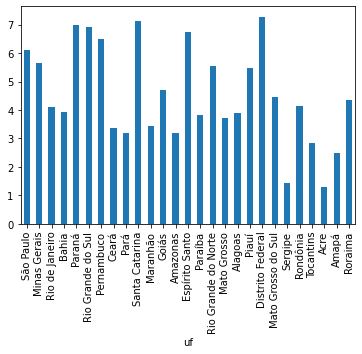

In [38]:
gastos_e_populacao_recente["gasto_por_habitante"].plot(kind = "bar")

Podemos ordenar o gráfico em ordem crescente ou descresente por estado que mais gasta por habitante, porém, da forma como ordenamos anteriormente, podemos visualizar os estados que mais gastam (no geral).

Com o gráfico, podemos verificar que os estados que mais gastam no total com com o SUS, não são necessáriamente os estados que mais gastam por habitante.

Iremos começar a utilizar a biblioteca Seaborn. Onde temos mais opções de gráficos como o scatterplot, que pode nos ajudar a analisar melhor esta informação.

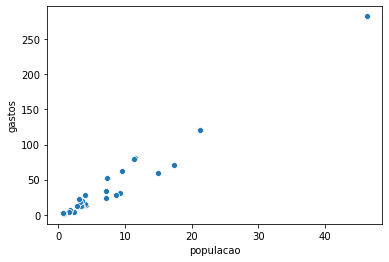

In [40]:
sns.scatterplot(data = gastos_e_populacao_recente / 1000000, x = "populacao", y = "gastos")

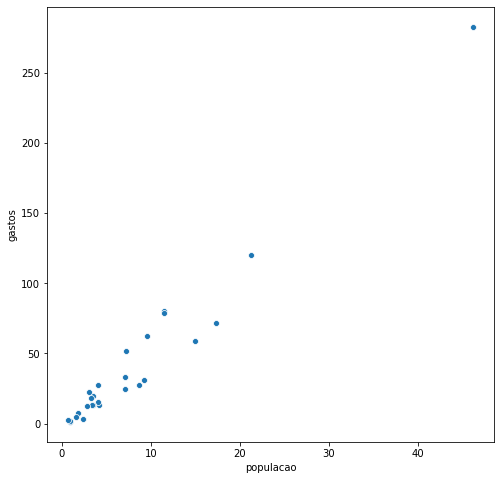

In [42]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = gastos_e_populacao_recente / 1000000, x = "populacao", y = "gastos")

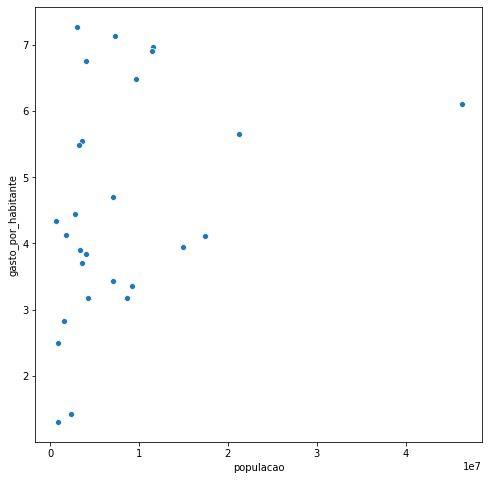

In [43]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante")

#### Desafios:
1. Ordenar o gráfico e criar uma visualização de gastos por habitante ordenada
2. Fazer os mesmos gráficos do final da aula 2.1 para meses anteriores, analisar e compartilhar suas hipóteses
3. Plotar no mesmo gráfico o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.
4. Analise os gráficos e tente chegar em hipóteses que explicam o que você está entendendo dos dados.

##### desafio 01

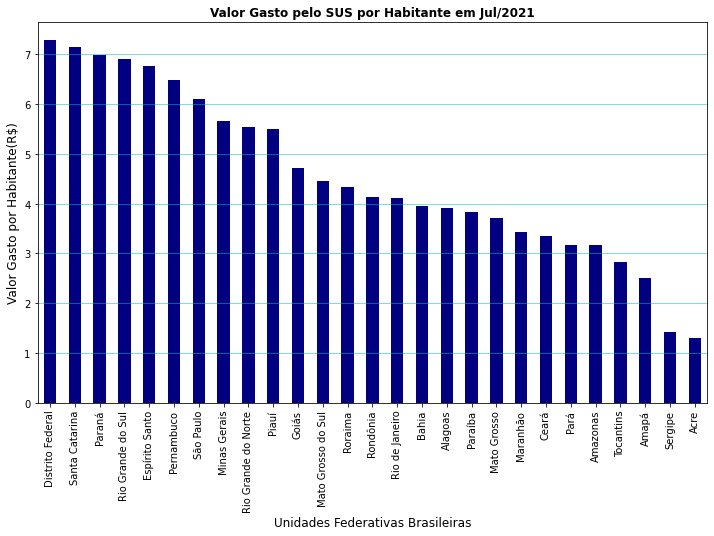

In [58]:
ax = gastos_e_populacao_recente.sort_values('gasto_por_habitante', ascending = False)["gasto_por_habitante"]
ax.plot(kind = "bar",color = "#000080" ,figsize = (12,7))
plt.grid(color='c', linestyle='-', linewidth=0.5, axis = 'y')
plt.xlabel("Unidades Federativas Brasileiras", fontdict={'fontsize': 12})
plt.ylabel("Valor Gasto por Habitante(R$)", fontdict={'fontsize': 12})
plt.title("Valor Gasto pelo SUS por Habitante em Jul/2021", fontweight='bold')
plt.show()

##### desafio 02

In [59]:
def gastos_e_gastos_por_habitante_para(dados, mes: str):
    dados[f"gastos_{mes}"] = dados[mes] * 1000000
    dados[f"gasto_por_habitante{mes}"] = dados["gastos"] / dados["populacao"]